In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from datetime import date
import seaborn as sns
from pydataset import data
from env import host, user, password
import os
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
import sklearn.preprocessing

In [3]:
iris = data('iris')
iris.rename(columns = {'Petal.Length':'petal_length', 'Petal.Width':'petal_width', 'Sepal.Length':'sepal_length', 'Sepal.Width':'sepal_width'}, inplace = True)

In [4]:
X = iris[['petal_length', 'sepal_width']]

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1], dtype=int32)

In [6]:
iris['cluster'] = kmeans.predict(X)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_length,sepal_width
0,1.462000,3.428000
1,5.672093,3.032558
2,4.328070,2.750877


Text(0.5, 1.0, 'Visualizing Cluster Centers')

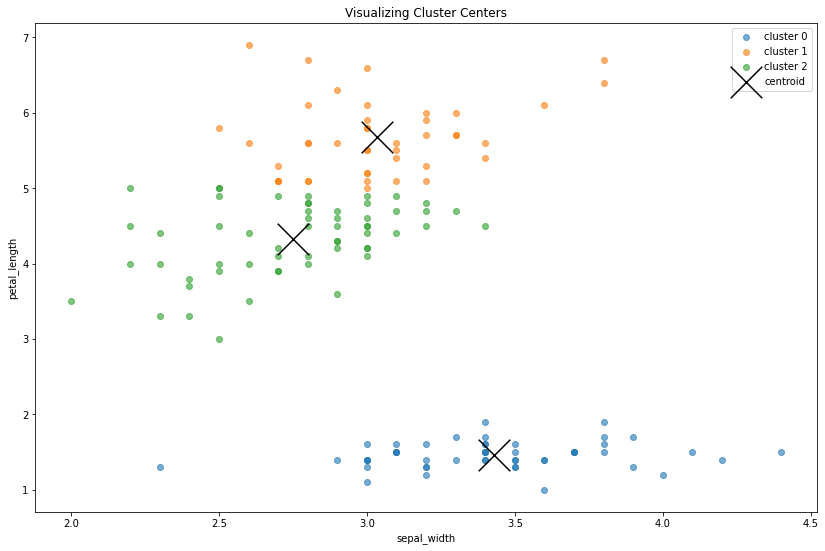

In [7]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_length, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_length', x='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_length')
plt.title('Visualizing Cluster Centers')

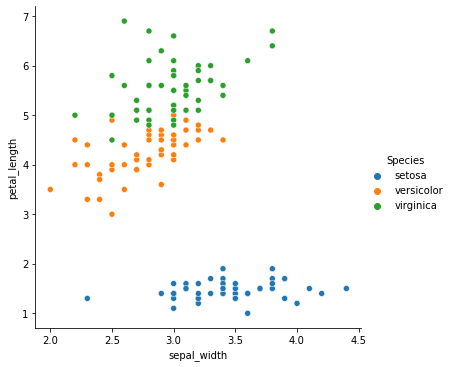

In [11]:
# Let's look at the actual
sns.relplot(data = iris, x = 'sepal_width', y = 'petal_length', hue = 'Species')

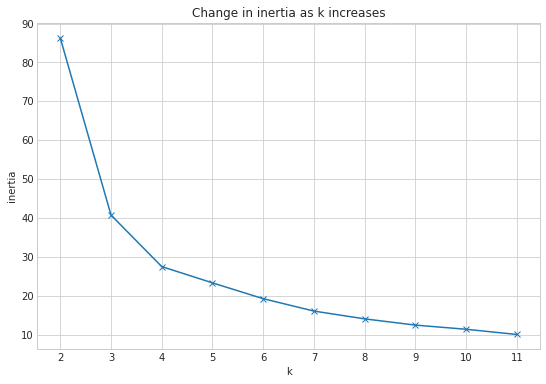

In [8]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [12]:
X = iris[['petal_length', 'sepal_width', 'petal_width']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [13]:
iris['cluster'] = kmeans.predict(X)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_length,sepal_width,petal_width
0,5.610638,3.004255,2.042553
1,1.462000,3.428000,0.246000
2,4.281132,2.754717,1.350943


Text(0.5, 1.0, 'Visualizing Cluster Centers')

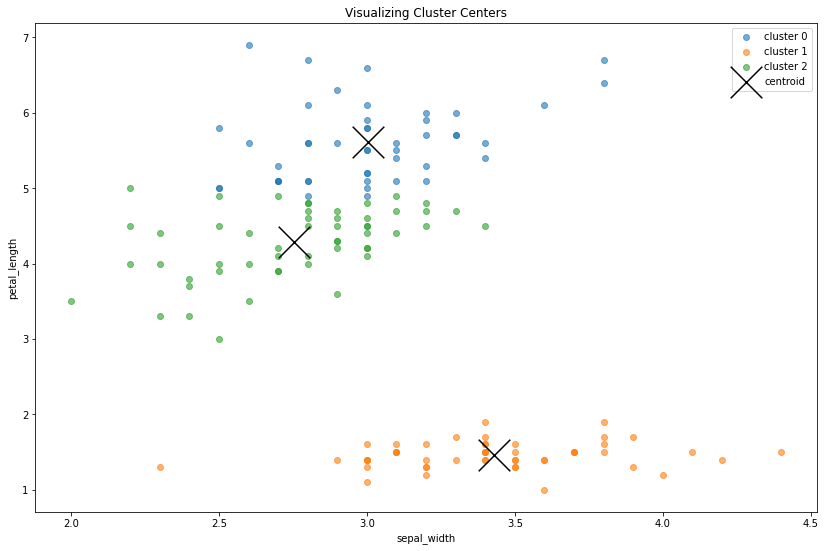

In [14]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_length, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_length', x='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_length')
plt.title('Visualizing Cluster Centers')

In [15]:
def get_mall_data(host = host, user = user, password = password):
    db = 'mall_customers'
    return pd.read_sql('SELECT * FROM customers', f'mysql+pymysql://{user}:{password}@{host}/{db}')

mall = get_mall_data()

In [54]:
mall

,is_female,age,annual_income,spending_score,spending_score_class,cluster
0,0,19,15,39,B,2
1,0,21,15,81,D,2
2,1,20,16,6,A,2
3,1,23,16,77,D,2
4,1,31,17,40,B,2
...,...,...,...,...,...,...
195,1,35,120,79,D,3
196,1,45,126,28,B,3
197,0,32,126,74,C,3
198,0,32,137,18,A,3


In [17]:
mall.drop(columns = ['customer_id'], inplace=True)

In [40]:
mall.rename(columns = {'gender': 'is_female'}, inplace= True)
mall['is_female'] = mall.is_female.replace({'Female': 1, 'Male': 0})

In [41]:
mall.describe()

,is_female,age,annual_income,spending_score,cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000,1.365000
std,0.497633,13.969007,26.264721,25.823522,0.978038
min,0.000000,18.000000,15.000000,1.000000,0.000000
25%,0.000000,28.750000,41.500000,34.750000,1.000000
50%,1.000000,36.000000,61.500000,50.000000,1.000000
75%,1.000000,49.000000,78.000000,73.000000,2.000000
max,1.000000,70.000000,137.000000,99.000000,3.000000


In [42]:
mall["spending_score_class"] = "A"
mall["spending_score_class"][(mall["spending_score"] > 25) & (mall['spending_score'] < 50)] = "B"
mall["spending_score_class"][(mall["spending_score"] > 50) & (mall['spending_score'] < 75)] = "C"
mall["spending_score_class"][mall["spending_score"] > 75] = "D"

In [43]:
X = mall[['annual_income', 'age']]

In [44]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

kmeans.predict(X)

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [45]:
mall['cluster'] = kmeans.predict(X)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,annual_income,age
0,51.017857,55.660714
1,72.958904,31.958904
2,29.212766,29.446809
3,106.500000,39.000000


Text(0.5, 1.0, 'Visualizing Cluster Centers')

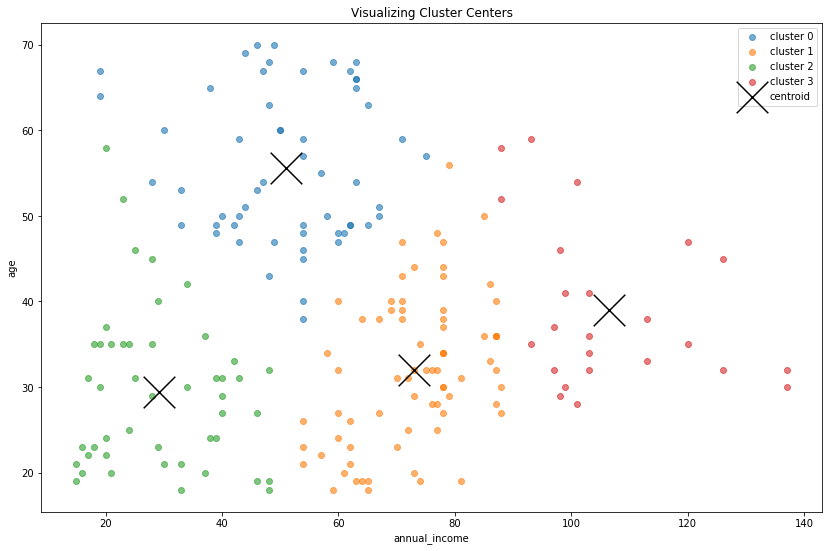

In [46]:
plt.figure(figsize=(14, 9))

for cluster, subset in mall.groupby('cluster'):
    plt.scatter(subset.annual_income, subset.age, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='age', x='annual_income', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('annual_income')
plt.ylabel('age')
plt.title('Visualizing Cluster Centers')

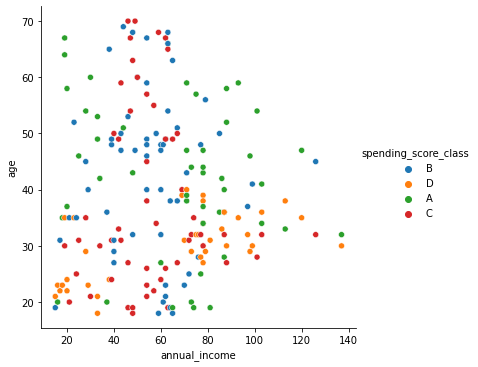

In [51]:
sns.relplot(data = mall, x = 'annual_income', y = 'age', hue = 'spending_score_class')

In [58]:
scaler_minmax = sklearn.preprocessing.MinMaxScaler()
scaler_minmax.fit(mall.drop(columns = ['spending_score_class']))
mall_scaled = scaler_minmax.transform(mall.drop(columns = ['spending_score_class']))
mall_scaled = pd.DataFrame(mall_scaled)
key = mall.drop(columns = ['spending_score_class']).columns.tolist()
mall_scaled.rename(columns = {i: key[i] for i in range(len(key))} , inplace = True)
mall_scaled['spending_score_class'] = mall['spending_score_class']

In [64]:
X = mall_scaled[['annual_income', 'age']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 3, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 3, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 3, 1, 1, 1, 2, 2, 2, 2, 1, 3, 3, 3, 1, 1, 3, 3, 2, 3, 3, 3,
       1, 1, 1, 1, 3, 1, 1, 3, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 1, 3, 1, 2, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       2, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [65]:
mall_scaled['cluster'] = kmeans.predict(X)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,annual_income,age
0,0.109631,0.195673
1,0.425449,0.138278
2,0.294276,0.729823
3,0.604976,0.386640


Text(0.5, 1.0, 'Visualizing Cluster Centers')

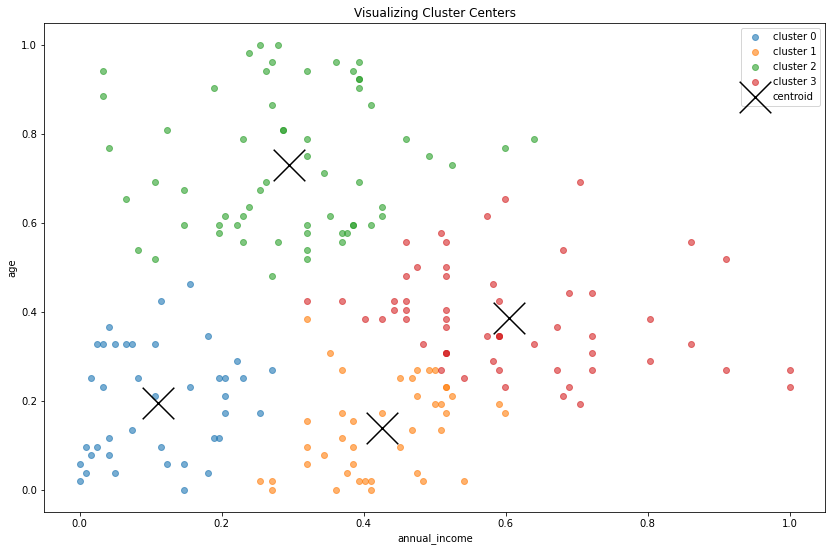

In [66]:
plt.figure(figsize=(14, 9))

for cluster, subset in mall_scaled.groupby('cluster'):
    plt.scatter(subset.annual_income, subset.age, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='age', x='annual_income', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('annual_income')
plt.ylabel('age')
plt.title('Visualizing Cluster Centers')